**1. Basic Probability**

In [1]:
### Question 1
import numpy as np
def compute_mean(X):
  return np.mean(X)
X = [2, 0, 2, 2, 7, 4, -2, 5, -1, -1]
print ("Mean: ", compute_mean(X))

Mean:  1.8


In [2]:
### Question 2
def compute_median(X):
  size = len(X)
  X = np.sort(X)
  print(X)
  if(size % 2 == 0):
    return (X[size//2] + X[size//2 - 1])/2
  else :
    return X[size//2]

X = [1, 5, 4, 4, 9, 13]
print ("Median: ", compute_median(X))

[ 1  4  4  5  9 13]
Median:  4.5


In [3]:
### Question 3
def compute_std(X):
  mean = compute_mean(X)
  variance = 0
  for x in X:
    variance += (x - mean)**2
  variance /= len(X)
  return np. sqrt(variance)

X = [171 , 176 , 155 , 167 , 169 , 182]
print(compute_std(X))

8.32666399786453


In [4]:
### Question 4
def compute_correlation_cofficient(X, Y):
  N = len(X)
  sigma_x, sigma_y = np.sum(X), np.sum(Y)
  sigma_xy = np.dot(X, Y)
  numerator = N*sigma_xy - sigma_x*sigma_y

  denominator = np.sqrt(N*np.sum(X**2) - sigma_x**2) * np.sqrt(N*np.sum(Y**2) - sigma_y**2)
  return np.round(numerator / denominator, 2)

X = np.asarray([-2, -5, -11, 6, 4, 15, 9])
Y = np.asarray([4, 25, 121, 36, 16, 225, 81])
print ("Correlation: ", compute_correlation_cofficient (X,Y))

Correlation:  0.42


**2. Tabular Data Analysis**

In [5]:
# Download dataset :
!gdown 1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq

Downloading...
From: https://drive.google.com/uc?id=1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
To: d:\OneDrive\PythonAI_Course\Modules\Homework\AIO_HW_Module2\Week4\advertising.csv

  0%|          | 0.00/4.06k [00:00<?, ?B/s]
100%|██████████| 4.06k/4.06k [00:00<?, ?B/s]


In [6]:
import pandas as pd
data = pd.read_csv("./advertising.csv")
# displaying the DataFrame
display(data)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
def correlation(x, y):  # compute correlatiob between x and y
    # Calculate the mean of x and y
    x_mean = x.mean()
    y_mean = y.mean()

    numerator = ((x - x_mean) * (y - y_mean)).sum()
    denominator = (((x - x_mean)**2).sum() * ((y - y_mean)**2).sum()) ** 0.5

    return numerator / denominator

In [8]:
# Example usage :
x = data["TV"]
y = data["Radio"]
corr_xy = correlation(x, y)
print (f"Correlation between TV and Sales: {round(corr_xy , 2)}")

Correlation between TV and Sales: 0.05


In [9]:
### Question 6
features = ["TV", "Radio", "Newspaper"]
for feature_1 in features :
  for feature_2 in features :
    correlation_value = correlation(data[feature_1], data[feature_2])
    print (f"Correlation between {feature_1} and {feature_2}: {round(correlation_value , 2)}")

Correlation between TV and TV: 1.0
Correlation between TV and Radio: 0.05
Correlation between TV and Newspaper: 0.06
Correlation between Radio and TV: 0.05
Correlation between Radio and Radio: 1.0
Correlation between Radio and Newspaper: 0.35
Correlation between Newspaper and TV: 0.06
Correlation between Newspaper and Radio: 0.35
Correlation between Newspaper and Newspaper: 1.0


In [10]:
### Question 7
x = data["TV"]
y = data["Newspaper"]
result = np.corrcoef(x, y)
print(result)
# Expected output : [[1. 0.35410375]
#                   [0.35410375 1. ]]

[[1.         0.05664787]
 [0.05664787 1.        ]]


In [11]:
### Question 8
features = ["TV", "Radio", "Newspaper", "Sales"]
correlation_matrix = []
for feature_1 in features:
  row = []
  for feature_2 in features:
    correlation_value = correlation(data[feature_1], data[feature_2])
    row.append(correlation_value)
  correlation_matrix.append(row)

# Create a Pandas DataFrame for display
df = pd.DataFrame(correlation_matrix, columns=features, index=features)
display(df)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [12]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


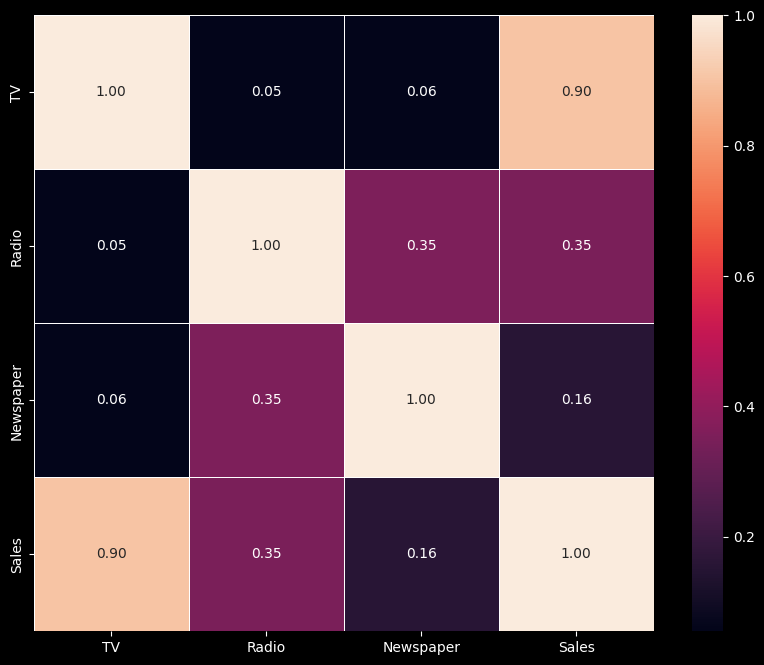

In [13]:
###Question 9
import matplotlib . pyplot as plt
import seaborn as sns

plt.figure(figsize = (10 ,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidth=.5)  # annot is to show number value of that box
plt.show ()

**3. Text Retrieval**

In [14]:
# Download dataset :
!gdown 1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6

Downloading...
From: https://drive.google.com/uc?id=1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6
To: d:\OneDrive\PythonAI_Course\Modules\Homework\AIO_HW_Module2\Week4\vi_text_retrieval.csv

  0%|          | 0.00/201k [00:00<?, ?B/s]
100%|██████████| 201k/201k [00:00<00:00, 327kB/s]
100%|██████████| 201k/201k [00:00<00:00, 327kB/s]


In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vi_data_df = pd.read_csv ("./vi_text_retrieval.csv")
display(vi_data_df)

,id,question,text
0,1570446247,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch..."
1,1570445661,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...
2,1570382095,Quân đội Hoa Kỳ gồm những lực lượng nào,Quân đội Hoa Kỳ hay Các lực lượng vũ trang Hoa...
3,1570382072,Ngọc Lan là ai,Ngọc Lan ( 28 tháng 12 năm 1956 - 6 tháng 3 20...
4,1570382037,Thu Phương từng được những giải thưởng nào,Cô được coi là một trong những ca sĩ thuộc thế...
...,...,...,...
495,1569486091,Dân số của Sóc Trăng đứng thứ mấy trong khu vự...,Sóc Trăng là một tỉnh ven biển thuộc đồng bằng...
496,1569486072,Các nguyên lý toán học của triết học tự nhiên ...,Đây là những điều cơ bản tiên quyết của cơ học...
497,1569486003,Biến đổi khí hậu Trái Đất là gì,Biến đổi khí hậu là những biến đổi trong môi t...
498,1569485614,Phanxicô Xaviê Trương Bửu Diệp mất vào năm nào,Phanxicô Xaviê Trương Bửu Diệp ( 1 tháng 1 năm...


In [18]:
###Question 10
context = vi_data_df["text"]
context = [doc.lower() for doc in context]
tfidf_vectorizer = TfidfVectorizer()
context_embedded = tfidf_vectorizer.fit_transform(context)
print(context_embedded)
context_embedded.toarray()[7][0]

  (0, 1775)	0.05325345132966253
  (0, 200)	0.3151807780057736
  (0, 1658)	0.11411971900223307
  (0, 1927)	0.15074511888384573
  (0, 1125)	0.12519435616843097
  (0, 924)	0.3079544280641318
  (0, 624)	0.10821841663105784
  (0, 2579)	0.2956426663544689
  (0, 2818)	0.3151807780057736
  (0, 2509)	0.40023418251134935
  (0, 1948)	0.12484259502421677
  (0, 912)	0.15960910750105828
  (0, 690)	0.10821841663105784
  (0, 2603)	0.06347316734527411
  (0, 2834)	0.11915996668515959
  (0, 2386)	0.1575903890028868
  (0, 1088)	0.12263649763841074
  (0, 1798)	0.11808348671732238
  (0, 2567)	0.045303505899602005
  (0, 2460)	0.12798505476294614
  (0, 1764)	0.13830685583523833
  (0, 691)	0.20011709125567467
  (0, 2148)	0.20011709125567467
  (0, 1216)	0.09844936080540546
  (0, 2393)	0.12655798205084048
  :	:
  (498, 772)	0.3983967568423319
  (498, 1845)	0.2071257014622154
  (498, 2633)	0.2071257014622154
  (499, 1775)	0.0671408703476896
  (499, 2567)	0.11423548107976668
  (499, 1375)	0.08971536492803045
  (49

0.31126580760710637

In [20]:
###Question 11:
def tfidf_search(question, tfidf_vectorizer, top_d =5):
  # lowercasing before encoding
  query_embedded = [doc.lower() for doc in question] # This line is likely causing the issue
  cosine_scores = cosine_similarity(tfidf_vectorizer.transform(query_embedded), context_embedded)

  # Get top k cosine score and index its
  results = []
  # Iterate over the first dimension of cosine_scores if it's 2D, otherwise assume it's 1D
  iterable = cosine_scores[0] if cosine_scores.ndim == 2 else cosine_scores
  for idx in iterable.argsort()[-top_d:][:: -1]:
    doc_score = {"id": idx, "cosine_score": iterable[idx]}
    results.append(doc_score) # Append inside the loop
  return results

# Pass a list of questions instead of a single string
question = [vi_data_df.iloc[0]["question"]]
results = tfidf_search(question, tfidf_vectorizer, top_d =5)
print(results)
results[0]["cosine_score"]

[{'id': 0, 'cosine_score': 0.6279910475266972}, {'id': 97, 'cosine_score': 0.21145795862251632}, {'id': 136, 'cosine_score': 0.1771475314979447}, {'id': 384, 'cosine_score': 0.15971218395887335}, {'id': 118, 'cosine_score': 0.1578067474650028}]


0.6279910475266972

In [21]:
### Question 12
from scipy import sparse

In [22]:
def correlation(x, y):
    """
    Calculate the correlation between two arrays.
    Handles the case where y is a sparse matrix.
    """
    x_mean = x.mean()
    if sparse.issparse(y):  # Check if y is a sparse matrix
        y_mean = y.mean()
        numerator = ((x - x_mean) * (y - y_mean).toarray()).sum()  # Convert to dense for subtraction
        denominator = (((x - x_mean)**2).sum() * ((y - y_mean).toarray()**2).sum()) ** 0.5
    else:
        y_mean = y.mean()
        numerator = ((x - x_mean) * (y - y_mean)).sum()
        denominator = (((x - x_mean)**2).sum() * ((y - y_mean)**2).sum()) ** 0.5

    if denominator == 0:
        return 0
    else:
        return numerator / denominator

def corr_search(question, tfidf_vectorizer, top_d =5):
  # lowercasing before encoding
  query_embedded = [doc.lower() for doc in question]
  query_embedded_transformed = tfidf_vectorizer.transform(query_embedded)
  corr_scores = []
  for i in range(context_embedded.shape[0]):
    corr_scores.append(correlation(query_embedded_transformed.toarray()[0], context_embedded[i].toarray()[0]))

  # Get top k correlation score and index its
  results = []
  for idx in np.argsort(corr_scores)[- top_d :][:: -1]:
    doc = {"id": idx, "corr_score": corr_scores[idx]}
    results.append (doc)
  return results

# Pass the question as a single-element list to maintain consistency
question = [vi_data_df.iloc[0]["question"]]
results = corr_search(question, tfidf_vectorizer, top_d =5)
print(results)
results [1]["corr_score"]

[{'id': 0, 'corr_score': 0.6259599752568743}, {'id': 97, 'corr_score': 0.2073424647197301}, {'id': 136, 'corr_score': 0.17124615520165115}, {'id': 384, 'corr_score': 0.15520346054699796}, {'id': 118, 'corr_score': 0.15444531996663274}]


0.2073424647197301